# Health Survey Data Analysis

Tyrrance P. Miller Jr.

## Executive Summary

In this project I will be performing some statistical data analysis on a dataset from the Center for Disease Control and Prevention (CDC). We will specifically be focusing on the relationship of the physical health or 'PHYSHLT'of people who rent their home or'RENTHOM1' and those who own their homes.

## The Data

The data used to perform this analysis is from the CDC Behavioral Risk Factor Surveillance System (BRFSS) which is a subset of data that represents survey responses from the 2020-2021 survey in the state of New York.

'PHYSHLTH' represents the number of days during the past 30 days physical health was not good.


The RENTHOM1 column represents those who own their homes and those who rent their homes.

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns



file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

## Data Preparation

To prepare the data I converted all instances of 88 to 0, and dropped all of the records where PHYSHLTH is 77, 99, or blank (NaN) by only pulling data for all values between 0 and 30.

For RENTHOM1 I dropped the records with values other than 1 or 2.
1: Are those who owned their homes.
2: Are those who rent their homes.

In [153]:
# TODO: write code to prepare the PHYSHLTH column
df['PHYSHLTH']

0        88.0
1        14.0
2        88.0
3         5.0
4        88.0
         ... 
14764    88.0
14765    88.0
14766     2.0
14767    88.0
14768    88.0
Name: PHYSHLTH, Length: 14769, dtype: float64

In [154]:
df['PHYSHLTH'].describe()

count    14769.000000
mean        67.801815
std         34.082730
min          1.000000
25%         30.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

(array([12775.,   622.,   275.,   768.,     0.,     0.,     0.,   248.,
            0.,    81.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

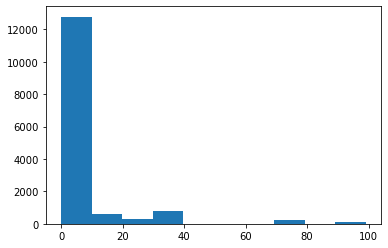

In [155]:
plt.hist(df['PHYSHLTH'].replace(to_replace = 88, value = 0))

In [156]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace(to_replace = 88, value = 0)

In [157]:
df = df[df['PHYSHLTH'] <= 30]

In [158]:
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [159]:
# TODO: write code to prepare the RENTHOM1 column
df['RENTHOM1']

0        2.0
1        1.0
2        2.0
3        3.0
4        2.0
        ... 
14764    2.0
14765    2.0
14766    2.0
14767    2.0
14768    3.0
Name: RENTHOM1, Length: 14440, dtype: float64

In [160]:
df = df[df['RENTHOM1']<= 2 ]

In [161]:
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

## Confidence Interval for Mean of `PHYSHLTH`

In [176]:
df['PHYSHLTH'].describe()

count    13659.000000
mean         3.064646
std          7.581325
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [177]:
df['PHYSHLTH'].mean()

3.064646020938575

In [178]:
sample = df['PHYSHLTH'].sample(n=500, random_state=40)

(array([389.,  36.,  12.,  14.,  10.,   9.,   5.,   1.,   2.,  22.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

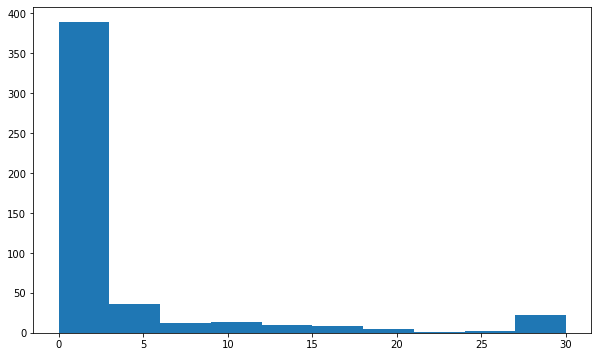

In [179]:
plt.figure(figsize=(10,6))
plt.hist(sample)

In [180]:
sample_mean = sample.mean()
sample_std = sample.std()
sample_size = len(sample)
se = sample_std/np.sqrt(sample_size)

In [181]:
# Calculate a 95% confidence interval about the mean of PHYSHLTH

stats.t.interval(alpha=0.95, loc=sample_mean, scale=se, df=sample_size-1)

(2.40958839010172, 3.6664116098982795)

Interpretation: We are 95% confident that the mean number of days of poor health falls within the range of 2.40958839010172 and 3.6664116098982795

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

Splitting the data based on RENTHON1 means that we will break down the data into subsets of those who rent their homes and those who own their homes and comparing the physical health of each group.

In [167]:
df[['PHYSHLTH','RENTHOM1']]

,PHYSHLTH,RENTHOM1
0,0.0,2.0
1,14.0,1.0
2,0.0,2.0
4,0.0,2.0
5,2.0,2.0
...,...,...
14763,0.0,2.0
14764,0.0,2.0
14765,0.0,2.0
14766,2.0,2.0


In [168]:
own = df.loc[df['RENTHOM1']== 1]['PHYSHLTH']
rent = df.loc[df['RENTHOM1']== 2]['PHYSHLTH']

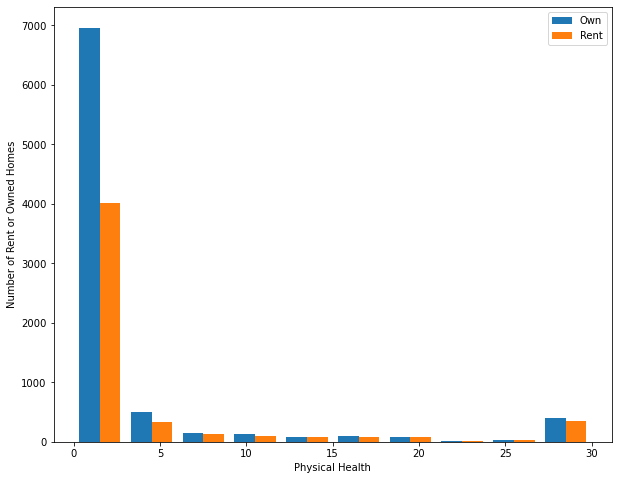

In [169]:
# Produce one or more plots that show the value of 
# PHYSHLTH based on the value of RENTHOM1

fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x=[own, rent], label=['Own', 'Rent'])
ax.set_xlabel('Physical Health')
ax.set_ylabel('Number of Rent or Owned Homes')

ax.legend()

In the visualization above we see the physical health of those who own their home and those who rent their home. We can interpret that there is a significant amount of home owners who had better physical health than those who rent homes.

### Is the Difference Statistically Significant?


Null Hypothesis: There is no significant difference in the physical health of those who own their home and those who rent thier home.

Alternative Hypothesis: There is a significant difference in the physical health those who own their home and those who rent their homes

Test type: This is a two-tailed test

In [170]:
df.groupby(['RENTHOM1'])['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
RENTHOM1,,,,,,,,
1.0,8453.0,2.675855,7.108881,0.0,0.0,0.0,0.0,30.0
2.0,5206.0,3.695928,8.253077,0.0,0.0,0.0,2.0,30.0


In [171]:
# Calculate the test statistic and p-value for a t-test

own_sample = own.sample(n=500, random_state=40)
rent_sample = rent.sample(n=500, random_state=40)

In [172]:
print("Variance of own sample: ", own_sample.var())
print("Variance of rent sample: ", rent_sample.var())

Variance of own sample:  46.94689779559127
Variance of rent sample:  70.98222044088205


In [173]:
result = stats.ttest_ind(own_sample, rent_sample, equal_var=False, alternative='two-sided')
result

Ttest_indResult(statistic=-2.6726935709544315, pvalue=0.007652327090943319)

In [174]:
p_value = result[1]
print("P-value of t-test: ", p_value)

P-value of t-test:  0.007652327090943319


Using an alpha of 0.05, we can reject the null hypothesis because the p-value is less than the alpha value.

## Next Steps


The next feature I would investigate from the CDC codebook would be ("HHADULT") which is the number of members in the household that are 18 years of age or older.

